In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram

In [ ]:
df=pd.read_csv(r"/content/ponds.csv")
shape= gpd.read_file(r"/content/district.shp")
df

,id,xcoord,ycoord
0,1,683749.6741,1197982.463
1,2,637183.7242,1100864.415
2,3,671876.7942,1023212.063
3,4,638752.6513,1138317.474
4,5,643285.1245,1102445.545
...,...,...,...
33760,33761,682522.5409,1163975.272
33761,33762,564075.9396,1281704.822
33762,33763,670263.3268,1019155.846
33763,33764,664783.3795,1046001.316


<Axes: >

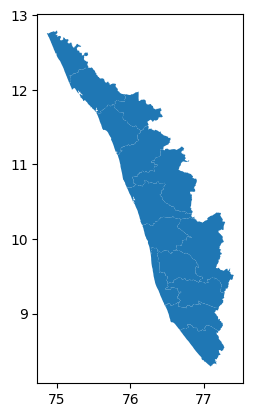

In [ ]:
shape.plot()

In [ ]:
shape

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,orig_ogc_f,geometry
0,Alappuzha,Kerala,32,11,598,7,"POLYGON ((76.37334 9.83565, 76.37955 9.82888, ..."
1,Ernakulam,Kerala,32,8,595,173,"POLYGON ((76.68924 10.26721, 76.68724 10.2617,..."
2,Idukki,Kerala,32,9,596,232,"POLYGON ((77.28895 10.22973, 77.29462 10.21643..."
3,Kannur,Kerala,32,2,589,277,"POLYGON ((75.46997 12.30049, 75.48558 12.29131..."
4,Kasaragod,Kerala,32,1,588,288,"POLYGON ((75.41667 12.50166, 75.4224 12.48463,..."
5,Kollam,Kerala,32,13,600,314,"POLYGON ((77.2086 9.07053, 77.20579 9.06505, 7..."
6,Kottayam,Kerala,32,10,597,320,"POLYGON ((76.63309 9.85565, 76.63167 9.85296, ..."
7,Kozhikode,Kerala,32,4,591,321,"POLYGON ((75.53697 11.69275, 75.54093 11.69615..."
8,Malappuram,Kerala,32,5,592,358,"POLYGON ((76.44699 11.20171, 76.44112 11.20301..."
9,Palakkad,Kerala,32,6,593,422,"POLYGON ((76.83918 10.33834, 76.83516 10.33669..."


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.isnull().sum()

,0
id,0
xcoord,0
ycoord,0


In [ ]:
df=df.drop_duplicates()

In [ ]:
df= df.drop(columns=['id'])

In [ ]:
# Create geometry column
geom=gpd.points_from_xy(df['xcoord'],df['ycoord'])
# Convert to GeoDataFrame
gdf=gpd.GeoDataFrame(df,geometry=geom,crs='epsg:32643')  #PCS
# Set coordinate Reference System(CRS) to GCS
# gcs=gdf.to_crs('epsg:4326')

In [ ]:
gdf

,xcoord,ycoord,geometry
0,683749.6741,1197982.463,POINT (683749.674 1197982.463)
1,637183.7242,1100864.415,POINT (637183.724 1100864.415)
2,671876.7942,1023212.063,POINT (671876.794 1023212.063)
3,638752.6513,1138317.474,POINT (638752.651 1138317.474)
4,643285.1245,1102445.545,POINT (643285.124 1102445.545)
...,...,...,...
33760,682522.5409,1163975.272,POINT (682522.541 1163975.272)
33761,564075.9396,1281704.822,POINT (564075.94 1281704.822)
33762,670263.3268,1019155.846,POINT (670263.327 1019155.846)
33763,664783.3795,1046001.316,POINT (664783.38 1046001.316)


In [ ]:
shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
pcs=shape.to_crs('epsg:32643')
pcs

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,orig_ogc_f,geometry
0,Alappuzha,Kerala,32,11,598,7,"POLYGON ((650600.487 1087549.643, 651284.422 1..."
1,Ernakulam,Kerala,32,8,595,173,"POLYGON ((685005.638 1135442.266, 684789.468 1..."
2,Idukki,Kerala,32,9,596,232,"POLYGON ((750743.545 1131701.736, 751374.948 1..."
3,Kannur,Kerala,32,2,589,277,"POLYGON ((551103.377 1359825.988, 552802.719 1..."
4,Kasaragod,Kerala,32,1,588,288,"POLYGON ((545272.714 1382062.819, 545899.155 1..."
5,Kollam,Kerala,32,13,600,314,"POLYGON ((742766.237 1003387.953, 742461.498 1..."
6,Kottayam,Kerala,32,10,597,320,"POLYGON ((679080.784 1089890.179, 678926.897 1..."
7,Kozhikode,Kerala,32,4,591,321,"POLYGON ((558519.742 1292634.36, 558951.356 12..."
8,Malappuram,Kerala,32,5,592,358,"POLYGON ((657982.438 1238670.025, 657340.521 1..."
9,Palakkad,Kerala,32,6,593,422,"POLYGON ((701386.56 1143400.766, 700947.506 11..."


In [ ]:
pcs.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
shape_1 = pcs[shape["DISTRICT"] == 'Wayanad']

In [ ]:
shape_1

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,orig_ogc_f,geometry
13,Wayanad,Kerala,32,3,590,610,"POLYGON ((654222.227 1300432.91, 654572 129967..."


In [ ]:
shape['DISTRICT']

,DISTRICT
0,Alappuzha
1,Ernakulam
2,Idukki
3,Kannur
4,Kasaragod
5,Kollam
6,Kottayam
7,Kozhikode
8,Malappuram
9,Palakkad


In [ ]:
gdf_points_wynd= gdf[gdf.within(shape_1.union_all())]

In [ ]:
gdf_points_wynd

,xcoord,ycoord,geometry
91,610053.3750,1304561.005,POINT (610053.375 1304561.005)
92,609567.1948,1303417.688,POINT (609567.195 1303417.688)
93,607750.2548,1301791.563,POINT (607750.255 1301791.563)
178,613372.7560,1281392.609,POINT (613372.756 1281392.609)
815,640464.7470,1288333.554,POINT (640464.747 1288333.554)
...,...,...,...
33703,614745.8880,1285711.068,POINT (614745.888 1285711.068)
33707,611644.1664,1315921.291,POINT (611644.166 1315921.291)
33709,613026.3328,1278343.977,POINT (613026.333 1278343.977)
33711,611252.1528,1276042.170,POINT (611252.153 1276042.17)


In [ ]:
clipped_gdf = gpd.clip(gdf, shape_1)

<Axes: >

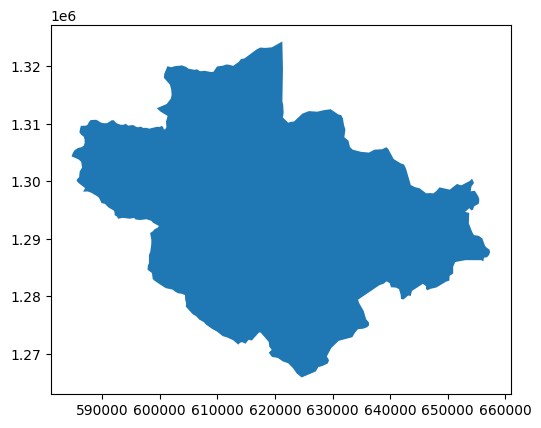

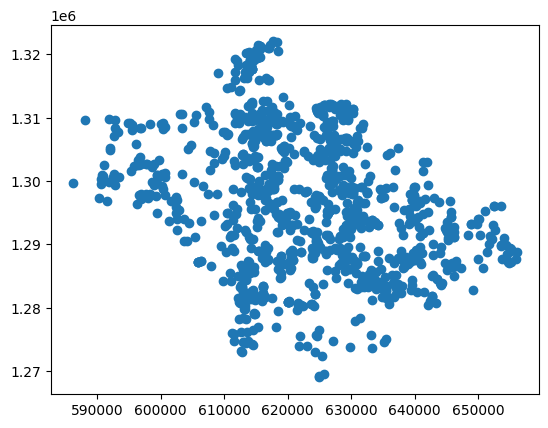

In [ ]:
shape_1.plot()
gdf_points_wynd.plot()

In [ ]:
clipped_gdf = gpd.clip(gdf, shape_1)

/tmp/ipython-input-3263331439.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


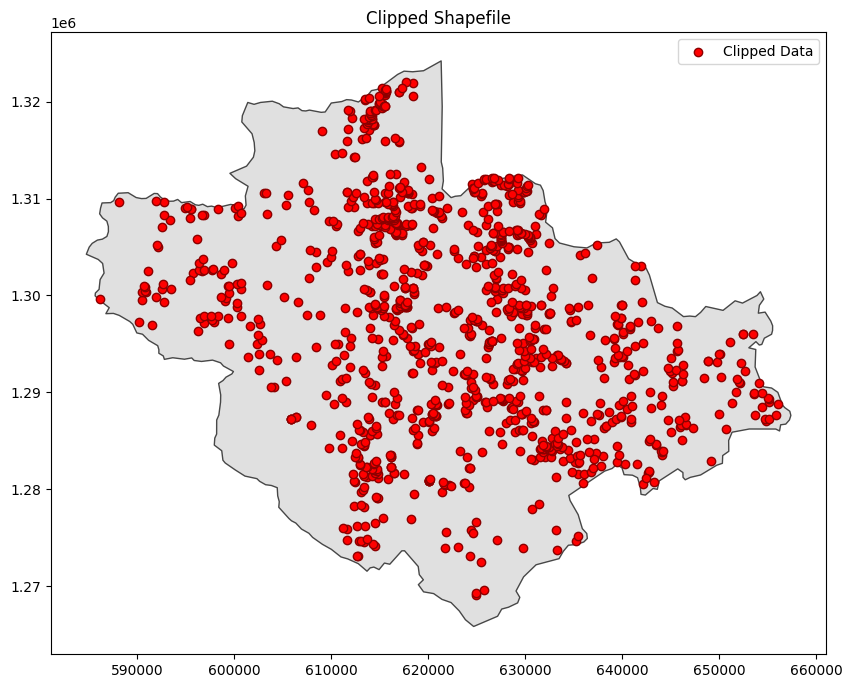

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot original data (optional, for context)
shape_1.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.7, label='Original 32643')

# Plot the clipped data
clipped_gdf.plot(ax=ax, color='red', edgecolor='darkred', label='Clipped Data')

ax.set_title('Clipped Shapefile')
ax.legend()
plt.show()

In [ ]:
X=np.vstack((gdf_points_tvm.geometry.x,gdf_points_tvm.geometry.y)).T
X


array([[729406.7592, 929887.5194],
       [729406.7592, 929887.5194],
       [699416.8041, 963372.2688],
       [727019.1581, 939567.5043],
       [710793.8688, 938962.0684],
       [690034.2478, 965806.489 ],
       [728514.5646, 920840.0576],
       [737599.1663, 922978.7259],
       [714901.6229, 939504.2198]])

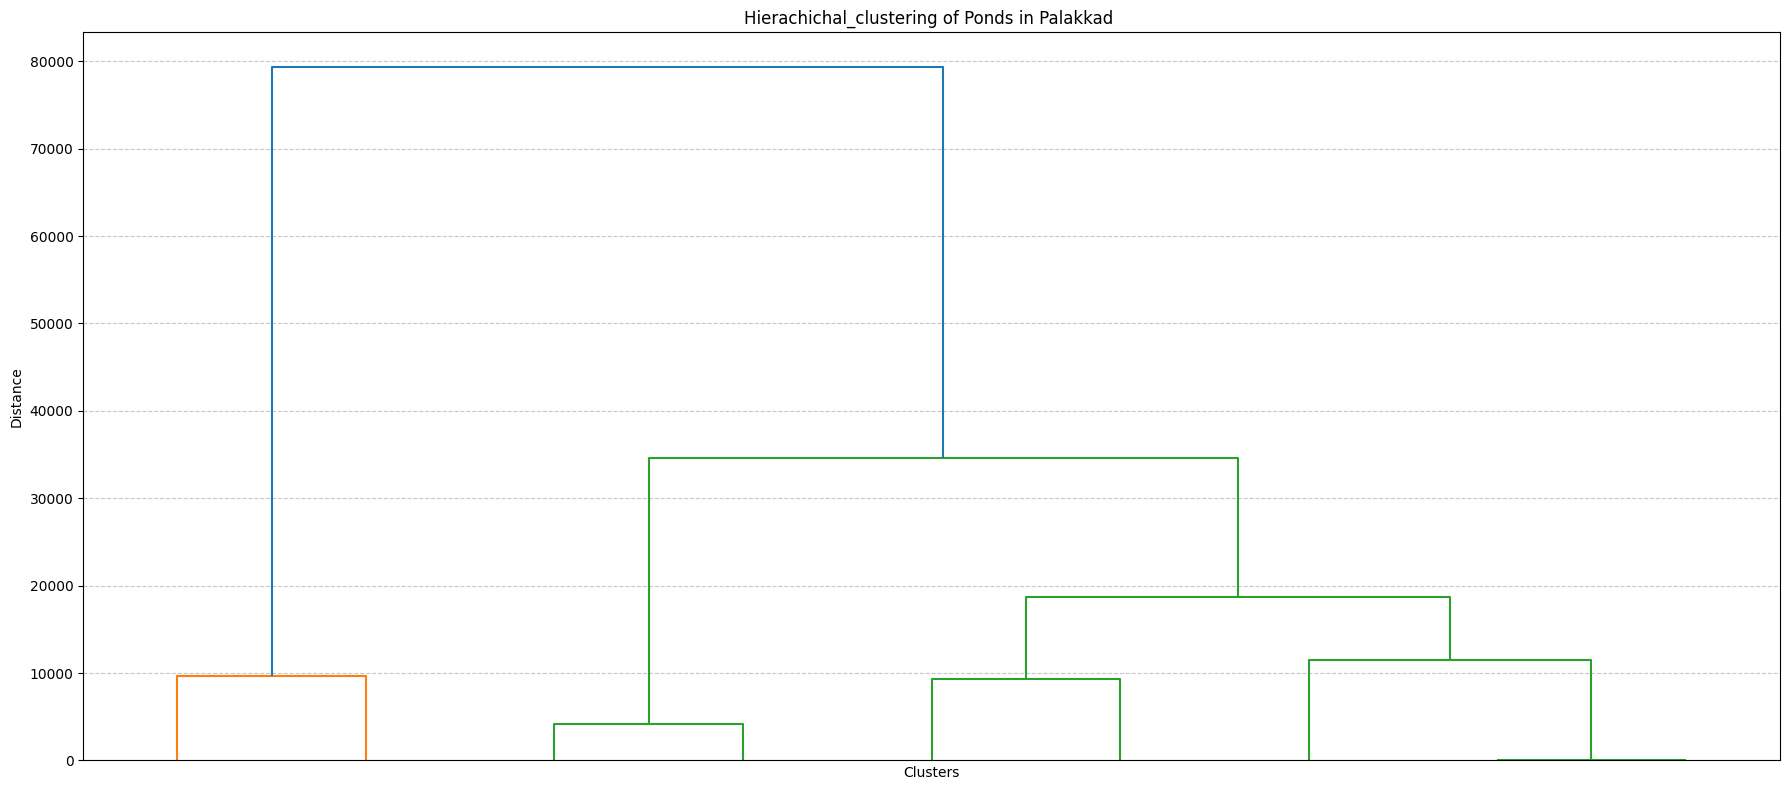

In [ ]:
#Extract coordinates

#Perform Hierarchical clustering
#Alternatives for method:'complete','Average','single'
linkage_data = linkage(X,method='ward',metric='euclidean')
plt.figure(figsize=(18,8))  # Make the figure wide

dendrogram(linkage_data,no_labels=True)

plt.title("Hierachichal_clustering of Ponds in Palakkad ")
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent labels/title from being cutoff
plt.show()

In [ ]:
df.describe

<bound method NDFrame.describe of             xcoord       ycoord
0      683749.6741  1197982.463
1      637183.7242  1100864.415
2      671876.7942  1023212.063
3      638752.6513  1138317.474
4      643285.1245  1102445.545
...            ...          ...
33760  682522.5409  1163975.272
33761  564075.9396  1281704.822
33762  670263.3268  1019155.846
33763  664783.3795  1046001.316
33764  657474.0643  1038745.270

[33765 rows x 2 columns]>

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Step 3: Cut the dendogram at a specific height
cut_height = 100000  #your desired height
cluster_labels =fcluster(linkage_data,t=cut_height,criterion='distance')


# Step 4:Attach labels back to your dataframe
gdf_points_tvm['cluster'] = cluster_labels

#Optional: Check How many clusters were formed
num_clusters= len(np.unique(cluster_labels))
print(f"Number of clusters at height {cut_height}:{num_clusters}")

Number of clusters at height 100000:1


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
